In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("/content/Comcast_telecom_complaints_data.csv")

In [ ]:
df.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No


In [ ]:
df.tail()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
2219,213550,Service Availability,04-02-15,04-Feb-15,9:13:18 AM,Customer Care Call,Youngstown,Florida,32466,Closed,No
2220,318775,Comcast Monthly Billing for Returned Modem,06-02-15,06-Feb-15,1:24:39 PM,Customer Care Call,Ypsilanti,Michigan,48197,Solved,No
2221,331188,complaint about comcast,06-09-15,06-Sep-15,5:28:41 PM,Internet,Ypsilanti,Michigan,48197,Solved,No
2222,360489,Extremely unsatisfied Comcast customer,23-06-15,23-Jun-15,11:13:30 PM,Customer Care Call,Ypsilanti,Michigan,48197,Solved,No
2223,363614,"Comcast, Ypsilanti MI Internet Speed",24-06-15,24-Jun-15,10:28:33 PM,Customer Care Call,Ypsilanti,Michigan,48198,Open,Yes


In [ ]:
df.shape

(2224, 11)

In [ ]:
df.isna().sum()

Ticket #                       0
Customer Complaint             0
Date                           0
Date_month_year                0
Time                           0
Received Via                   0
City                           0
State                          0
Zip code                       0
Status                         0
Filing on Behalf of Someone    0
dtype: int64

No missing values

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Ticket #                     2224 non-null   object
 1   Customer Complaint           2224 non-null   object
 2   Date                         2224 non-null   object
 3   Date_month_year              2224 non-null   object
 4   Time                         2224 non-null   object
 5   Received Via                 2224 non-null   object
 6   City                         2224 non-null   object
 7   State                        2224 non-null   object
 8   Zip code                     2224 non-null   int64 
 9   Status                       2224 non-null   object
 10  Filing on Behalf of Someone  2224 non-null   object
dtypes: int64(1), object(10)
memory usage: 191.2+ KB


In [ ]:
for i in df.columns:
  if (i!="Ticket #"):
    print(i)
    print(df[i].nunique())
    print("-------------------")

Customer Complaint
1841
-------------------
Date
91
-------------------
Date_month_year
91
-------------------
Time
2190
-------------------
Received Via
2
-------------------
City
928
-------------------
State
43
-------------------
Zip code
1543
-------------------
Status
4
-------------------
Filing on Behalf of Someone
2
-------------------


In [ ]:
df["dates"]=pd.to_datetime(df["Date_month_year"])

In [ ]:
df.drop(["Date","Date_month_year"],axis=1,inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Ticket #                     2224 non-null   object        
 1   Customer Complaint           2224 non-null   object        
 2   Time                         2224 non-null   object        
 3   Received Via                 2224 non-null   object        
 4   City                         2224 non-null   object        
 5   State                        2224 non-null   object        
 6   Zip code                     2224 non-null   int64         
 7   Status                       2224 non-null   object        
 8   Filing on Behalf of Someone  2224 non-null   object        
 9   dates                        2224 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(8)
memory usage: 173.9+ KB


In [ ]:
#plt.scatter(df[df.Year==i]["Month"],df[df.Year==i]["Weekly_Sales"])

In [ ]:
df["month"]=df["dates"].dt.month
df["day"]=df["dates"].dt.day

In [ ]:
df["day"].unique()

array([22,  4, 18,  5, 26,  6, 24, 23, 28, 13, 30, 27, 16, 29, 19, 20, 21,
       14, 15, 25, 17, 31])

In [ ]:
df["month"].nunique()

12

In [ ]:
dfd = df.groupby(["month","day"])["Customer Complaint"].count()

In [ ]:
dfm = df.groupby(["month"])["Customer Complaint"].count()

In [ ]:
dfm=dfm.reset_index()

In [ ]:
dfm

,month,Customer Complaint
0,1,55
1,2,59
2,3,45
3,4,375
4,5,317
5,6,1046
6,7,49
7,8,67
8,9,55
9,10,53


<Axes: xlabel='month', ylabel='Customer Complaint'>

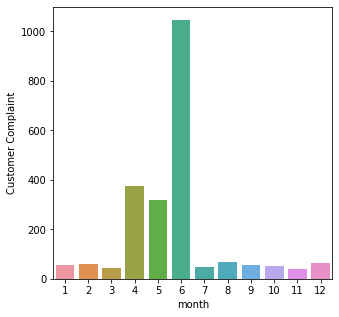

In [ ]:
plt.figure(figsize=(5,5))
sns.barplot(x=dfm["month"],y=dfm["Customer Complaint"])

June month has the highest customer complaints while November has the lowest

Plotting the complaint types having count higher than 5

In [ ]:
dfd=dfd.reset_index()

In [ ]:
dfd[dfd["month"]==8]

,month,day,Customer Complaint
76,8,4,28
77,8,5,15
78,8,6,24


In [ ]:
def monthlyplot(i):
  dfdm = dfd[dfd["month"]==i]
  sns.barplot(x="day",y="Customer Complaint",data=dfdm)
  plt.title("Per day complaint count for the month "+str(i))


Date Wise Complaint for every month

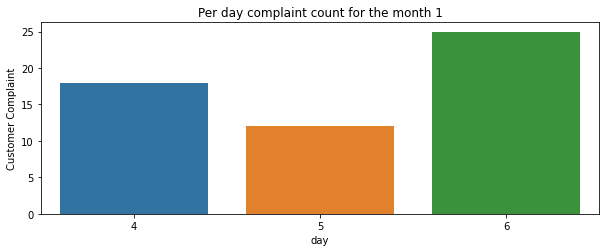

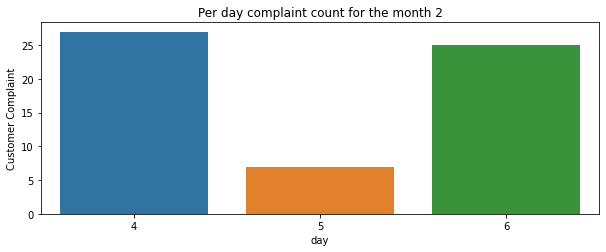

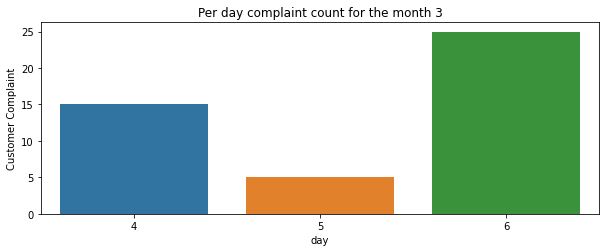

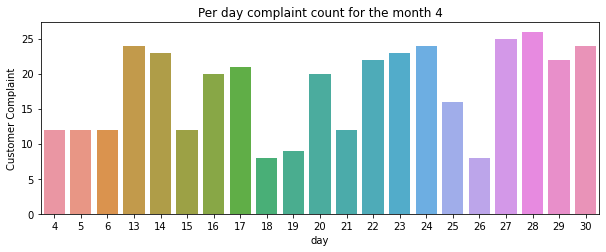

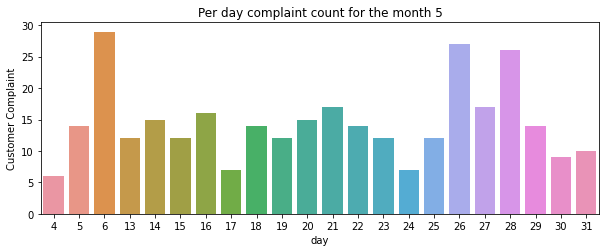

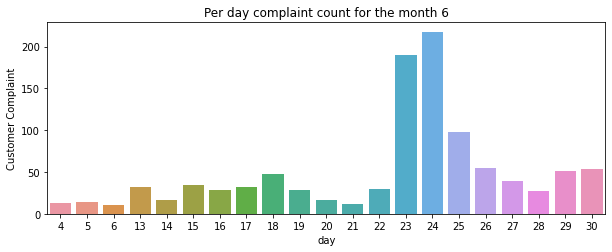

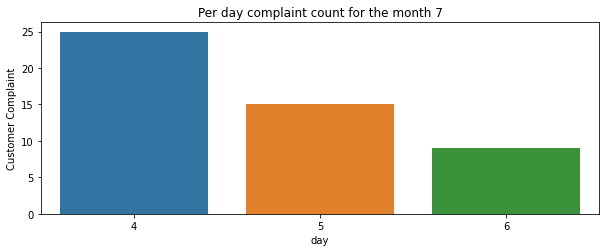

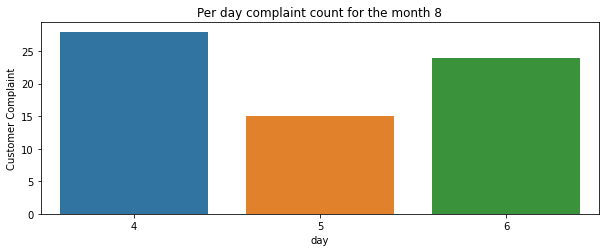

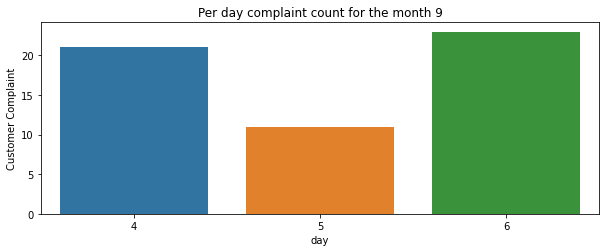

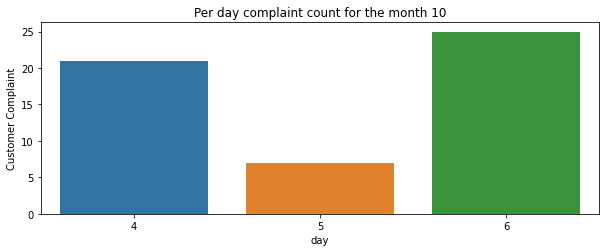

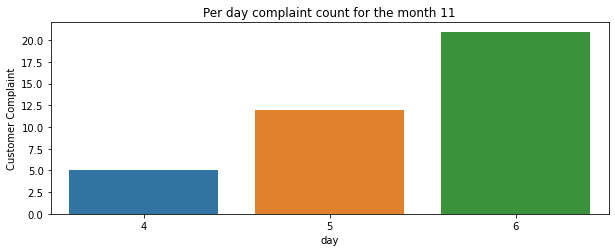

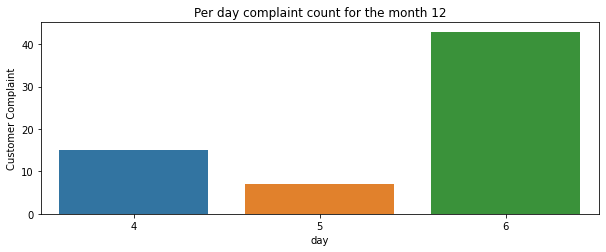

In [ ]:

for i in range(1,13):
  plt.figure(figsize=(10,50))
  plt.subplot(12,1,i)
  monthlyplot(i)
  plt.show()


Highest complaints wew on June for the dates 23 and 24 where number of complaints exceeded 150

In [ ]:
df["Customer Complaint"]=df["Customer Complaint"].str.upper()

In [ ]:

dfrec = df[["Received Via","status"]]
dfrec1=dfrec.groupby(["Received Via"])["status"].value_counts()
dfrec1=dfrec1.reset_index(name="count")
dfrec1["percent"]=dfrec1["count"]/dfrec1["count"].sum()*100
dfrec1

,Received Via,status,count,percent
0,Customer Care Call,Closed,864,38.848921
1,Customer Care Call,Open,255,11.465827
2,Internet,Closed,843,37.904676
3,Internet,Open,262,11.780576


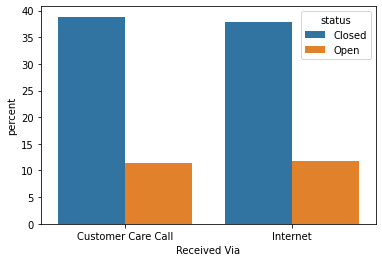

In [ ]:
sns.barplot(x="Received Via",y="percent",hue="status",data=dfrec1)
plt.show()

In [ ]:
com = df["Customer Complaint"].value_counts()
com=com[com>5].reset_index()
com

,index,Customer Complaint
0,Comcast,83
1,Comcast Internet,18
2,Comcast Data Cap,17
3,comcast,13
4,Comcast Billing,11
5,Data Caps,11
6,Comcast Data Caps,11
7,Unfair Billing Practices,9
8,Comcast data cap,8
9,Comcast internet,8


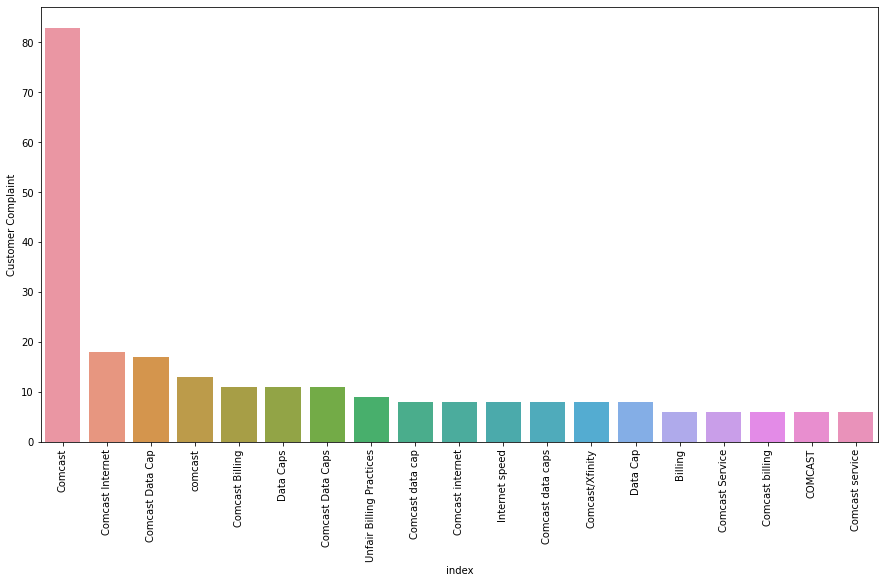

In [ ]:
plt.figure(figsize=(15,8))
sns.barplot(x="index",y="Customer Complaint",data=com)
plt.xticks(rotation=90)
plt.show()

In [ ]:
df["Status"].value_counts()

Solved     973
Closed     734
Open       363
Pending    154
Name: Status, dtype: int64

In [ ]:
stats=[]
for i in df["Status"]:
  if(i=="Solved"):
    stats.append("Closed")
  elif(i=="Closed"):
    stats.append("Closed")
  elif(i=="Open"):
    stats.append("Open")
  else:
    stats.append("Open")

In [ ]:
df["status"]=stats

In [ ]:
df["State"].value_counts()

Georgia                 288
Florida                 240
California              220
Illinois                164
Tennessee               143
Pennsylvania            130
Michigan                115
Washington               98
Colorado                 80
Maryland                 78
New Jersey               75
Texas                    71
Massachusetts            61
Virginia                 60
Indiana                  59
Oregon                   49
Mississippi              39
Minnesota                33
Alabama                  26
Utah                     22
Arizona                  20
South Carolina           18
District Of Columbia     16
New Mexico               15
Louisiana                13
Delaware                 12
New Hampshire            12
Connecticut              12
West Virginia            11
Kentucky                  7
New York                  6
Arkansas                  6
Maine                     5
Missouri                  4
Ohio                      3
Vermont             

In [ ]:
dfs=df.groupby(["State"])["status"].value_counts()

In [ ]:
dfs=dfs.reset_index(name="val")
dfs

,State,status,val
0,Alabama,Closed,17
1,Alabama,Open,9
2,Arizona,Closed,14
3,Arizona,Open,6
4,Arkansas,Closed,6
...,...,...,...
72,Virginia,Open,11
73,Washington,Closed,75
74,Washington,Open,23
75,West Virginia,Closed,8


In [ ]:
dfs=dfs.pivot_table(index=["State"],columns='status',values='val',aggfunc='first').rename_axis(columns=None).reset_index()

In [ ]:
dfs

,State,Closed,Open
0,Alabama,17.0,9.0
1,Arizona,14.0,6.0
2,Arkansas,6.0,NaN
3,California,159.0,61.0
4,Colorado,58.0,22.0
5,Connecticut,9.0,3.0
6,Delaware,8.0,4.0
7,District Of Columbia,14.0,2.0
8,District of Columbia,1.0,NaN
9,Florida,201.0,39.0


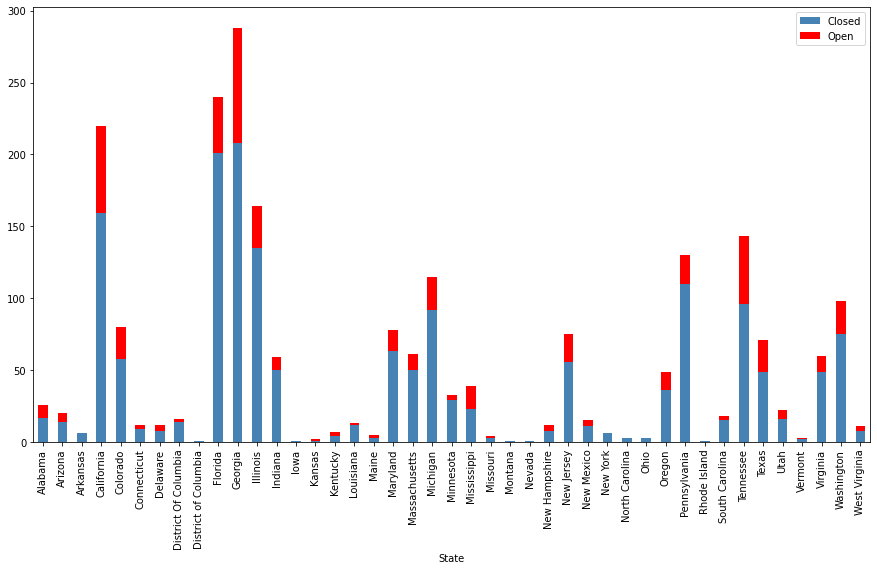

In [ ]:
dfs.set_index('State').plot(kind='bar', stacked=True, color=['steelblue', 'red'],figsize=(15,8))
plt.show()

Georgia has highest number of complaints



In [ ]:
dfs["unres"]=dfs["Open"]/(dfs["Open"].sum())*100

In [ ]:
m=dfs.unres.max()
print("The highest open complaint percentage is " +str(m))
dfs.loc[dfs['unres'] == m, 'State']


The highest open complaint percentage is 15.473887814313347


10    Georgia
Name: State, dtype: object

Georgia has highest percentage of open complaints of 15.47%